In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import hvplot.pandas
import hvplot.dask
from pathlib import Path
from collections import Counter
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
import seaborn as sns

# Import password for DB
from config import password

In [ ]:
# Begin SQLAlchemy
from sqlalchemy import create_engine, inspect
from config import password
url= "postgresql://postgres:" + password + "@localhost/Team_Two"
engine = create_engine(url)


In [56]:
# Get the name of the table. 
inspector = inspect(engine)
inspector.get_table_names()

['EMPLOYEES', 'MENTAL_HEALTH']

In [57]:
# Make a connection to the SQL database
conn = engine.connect()

In [58]:
# Using the inspector to print the column names within the 'MENTAL_HEALTH' table in FILE.sqlite and its types
columns = inspector.get_columns('MENTAL_HEALTH')
for column in columns:
    print(column)

{'name': 'ID', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MENTAL_HEALTH_COVERAGE', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'TECH_COMPANY', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'AWARENESS_OF_MENTAL_HEALTH_C

In [59]:
# Query Employees Records in the the Database
df_e = pd.read_sql('SELECT * FROM "EMPLOYEES"', conn)
df_e.head()

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH
0,0,39,Male,United Kingdom,Sometimes
1,1,29,male,United States of America,Never
2,2,38,Male,United Kingdom,Always
3,3,43,male,United Kingdom,Sometimes
4,4,43,Female,United States of America,Sometimes


In [60]:
# Query Mental_Health Records in the the Database
df_m=pd.read_sql('SELECT * FROM "MENTAL_HEALTH"', conn)
df_m

,ID,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,Not eligible for coverage,1.0,None,No,NaN,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,No,1.0,Yes,Yes,NaN,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,No,1.0,None,No,NaN,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,None,NaN,None,None,1.0,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,Yes,0.0,Yes,No,NaN,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
...,...,...,...,...,...,...,...,...,...,...,...
1428,1428,None,NaN,None,None,1.0,"Yes, they all did",I was aware of some,Some did,Maybe,No
1429,1429,None,NaN,None,None,1.0,None,None,None,"No, it has not",No
1430,1430,Yes,1.0,Yes,Yes,NaN,Some did,I was aware of some,Some did,"Yes, it has",Maybe
1431,1431,I don't know,0.0,I am not sure,Yes,NaN,"No, none did",N/A (not currently aware),None did,"No, I don't think it would",Yes


In [61]:
# Merge the Two Tables
df=df_e.merge(df_m, how='outer', on='ID')
df.head()

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,1.0,None,No,NaN,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,No,1.0,Yes,Yes,NaN,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,1.0,None,No,NaN,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,None,NaN,None,None,1.0,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,0.0,Yes,No,NaN,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes


In [62]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 1432
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ID                                                     1433 non-null   int64  
 1   AGE                                                    1433 non-null   int64  
 2   GENDER                                                 1430 non-null   object 
 3   COUNTRY_WORKING_IN                                     1433 non-null   object 
 4   WFH                                                    1433 non-null   object 
 5   MENTAL_HEALTH_COVERAGE                                 1146 non-null   object 
 6   TECH_COMPANY                                           1146 non-null   float64
 7   MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                   1013 non-null   object 
 8   EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES          

In [63]:
# Describe the data
df.describe()

,ID,AGE,TECH_COMPANY,MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT
count,1433.00000,1433.000000,1146.000000,287.000000
mean,716.00000,34.286113,0.770506,0.644599
std,413.81578,11.290931,0.420691,0.479471
min,0.00000,3.000000,0.000000,0.000000
25%,358.00000,28.000000,1.000000,0.000000
50%,716.00000,33.000000,1.000000,1.000000
75%,1074.00000,39.000000,1.000000,1.000000
max,1432.00000,323.000000,1.000000,1.000000


In [64]:
# Check df for duplicates

df.duplicated().sum()

0

In [65]:
# Check df shape

df.shape

(1433, 15)

In [66]:
# Check df columns

df.columns

Index(['ID', 'AGE', 'GENDER', 'COUNTRY_WORKING_IN', 'WFH',
       'MENTAL_HEALTH_COVERAGE', 'TECH_COMPANY',
       'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
       'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT',
       'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
       'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
       'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER',
       'CURRENT_MENTAL_HEALTH_DISORDER'],
      dtype='object')

In [67]:
# Find df null values

df.isnull().sum()

ID                                                          0
AGE                                                         0
GENDER                                                      3
COUNTRY_WORKING_IN                                          0
WFH                                                         0
MENTAL_HEALTH_COVERAGE                                    287
TECH_COMPANY                                              287
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                      420
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                    287
MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT       1146
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS             169
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS     169
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES               169
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                     0
CURRENT_MENTAL_HEALTH_DISORDER                              0
dtype: int64

In [68]:
# Drop MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT column from d

df.drop(['MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT'], axis=1, inplace=True)

In [69]:
# Replace null values in Gender column of df

df["GENDER"].fillna("NA", inplace = True)
df

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,1.0,None,No,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,No,1.0,Yes,Yes,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,1.0,None,No,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,None,NaN,None,None,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,0.0,Yes,No,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1428,34,Female,United States of America,Sometimes,None,NaN,None,None,"Yes, they all did",I was aware of some,Some did,Maybe,No
1429,1429,56,MALE,Afghanistan,Sometimes,None,NaN,None,None,None,None,None,"No, it has not",No
1430,1430,52,Male,United States of America,Sometimes,Yes,1.0,Yes,Yes,Some did,I was aware of some,Some did,"Yes, it has",Maybe
1431,1431,30,Female,United States of America,Sometimes,I don't know,0.0,I am not sure,Yes,"No, none did",N/A (not currently aware),None did,"No, I don't think it would",Yes


In [70]:
# Replace null values in MENTAL_HEALTH_COVERAGE column of df

df["MENTAL_HEALTH_COVERAGE"].fillna("NA", inplace = True)

In [71]:
# Replace null values in TECH_COMPANY column of df

df["TECH_COMPANY"].fillna("NA", inplace = True)

In [72]:
# Replace null values in MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE column of df

df["MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE"].fillna("NA", inplace = True)

In [73]:
# Replace null values in EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  column of df

df["EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES"].fillna("NA", inplace = True)

In [74]:
# Replace null values in PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS column of df

df["PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS"].fillna("NA", inplace = True)

In [75]:
# Replace null values in AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS column of df
df["AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS"].fillna("NA", inplace = True)

In [76]:
# Replace null values in PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES column of df
df["PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES"].fillna("NA", inplace = True)

In [77]:
# Find null values of df
df.isnull().sum()

ID                                                       0
AGE                                                      0
GENDER                                                   0
COUNTRY_WORKING_IN                                       0
WFH                                                      0
MENTAL_HEALTH_COVERAGE                                   0
TECH_COMPANY                                             0
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     0
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   0
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            0
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    0
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              0
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  0
CURRENT_MENTAL_HEALTH_DISORDER                           0
dtype: int64

In [78]:
# Check datatypes of df
df.dtypes

ID                                                        int64
AGE                                                       int64
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                   object
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [79]:
# Changes TECH_COMPANY to an integer to be encoded 
df['TECH_COMPANY'] = df['TECH_COMPANY'].replace([1.0,0.0], ['Yes','No'])
df.head(10)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,Not eligible for coverage,Yes,NA,No,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,No,Yes,Yes,Yes,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,Yes,NA,No,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,NA,NA,NA,NA,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,No,Yes,No,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
5,5,42,Male,United Kingdom,Sometimes,Yes,Yes,I am not sure,Yes,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes
6,6,30,M,United States of America,Sometimes,I don't know,Yes,No,No,Some did,I was aware of some,Some did,"Yes, I think it would",No
7,7,37,female,United States of America,Always,Yes,Yes,Yes,Yes,Some did,I was aware of some,Some did,Maybe,Yes
8,8,44,Female,United States of America,Sometimes,I don't know,No,No,No,I don't know,N/A (not currently aware),None did,Maybe,Yes
9,9,30,Male,United States of America,Always,NA,NA,NA,NA,Some did,I was aware of some,None did,Maybe,Yes


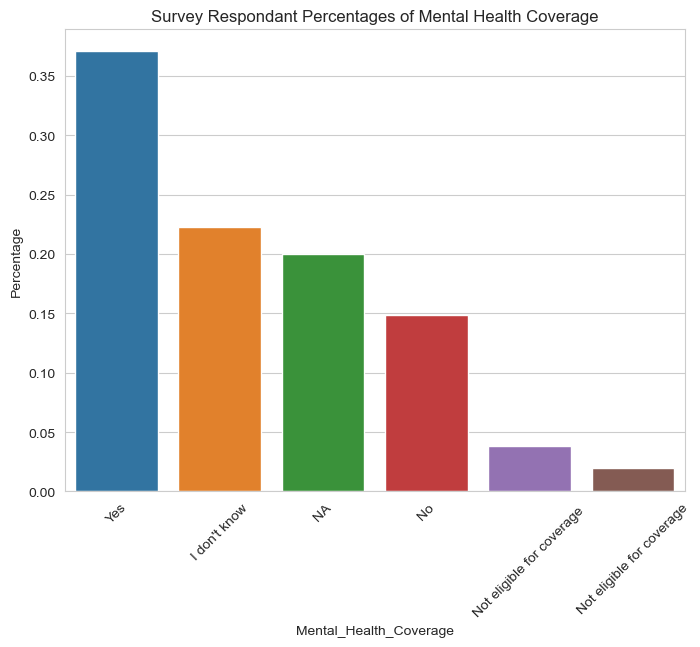

In [80]:
# Bar plot to show percentages of Mental Health Coverage by survery respondants

sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_percentage = df['MENTAL_HEALTH_COVERAGE'].value_counts(normalize = True).rename_axis('Mental_Health_Coverage').reset_index(name = 'Percentage')
sns.barplot(x = 'Mental_Health_Coverage', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Survey Respondant Percentages of Mental Health Coverage')
plt.xticks(rotation = 45)
plt.show()

In [81]:
# clean "Gender" column

df.GENDER = df.GENDER.str.lower()
male = ["male", "m", "male-ish", "sex is male", "male.", "male (trans, ftm)", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male",
         "nb masculine", "male 9:1 female, roughly", "cisdude", "m|", "I'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
         "male/genderqueer", ]
female = ["cis female", "female", "cis-woman", "female-bodied; no feelings about gender", "cisgender female", "f", "fm", "female", "female/woman", "woman",  "femake", "female ", "cis-female/femme", "female (cis)", "femail", "i identify as female.", "female (props for making this a freeform field, though)", 
           "genderqueer woman", "fem", "genderflux demi-girl", "transgender woman", "female assigned at birth"]
other = ["other", "bigender", "female assigned at birth", "trans-female", "something kinda male?", "queer/she/they", "non-binary", "nonbinary", "na", "nah", 
         "human", "all", "enby", "fluid", "other/transfeminine", "androgynous", "" 
         "genderqueer", "androgyne", "agender", "mtf", "dude", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", 
         "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you", "none of your business", "afab", 
         "genderfluid", "unicorn"]

df.GENDER.loc[df.GENDER.isin(male)] = 'male'
df.GENDER.loc[df.GENDER.isin(female)] = 'female'
df.GENDER.loc[df.GENDER.isin(other)] = 'others'

# color palette for seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# List gender values
gender_values = df.GENDER.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'GENDER': 'count'})
table_gender = gender_values.style.background_gradient(cmap=cmap)
table_gender

,count
male,1059
female,339
others,28
female assigned at birth,1
cis female,1
"transitioned, m2f",1
genderfluid (born female),1
female or multi-gender femme,1
i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?,1
female,1


In [37]:
# Converting Target to two categories for simplicity 
df['MENTAL_HEALTH_COVERAGE'] = df['MENTAL_HEALTH_COVERAGE'].replace(['NA',"Not eligible for coverage","I don't know","Not eligible for coverage "], ['No','No','No','No'])
df.head(10)

,ID,AGE,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,0,39,Male,United Kingdom,Sometimes,No,Yes,NA,No,"No, none did",N/A (not currently aware),None did,Maybe,No
1,1,29,male,United States of America,Never,No,Yes,Yes,Yes,"Yes, they all did",I was aware of some,Some did,"No, I don't think it would",Yes
2,2,38,Male,United Kingdom,Always,No,Yes,NA,No,"No, none did",N/A (not currently aware),Some did,Maybe,No
3,3,43,male,United Kingdom,Sometimes,No,NA,NA,NA,Some did,N/A (not currently aware),None did,"Yes, I think it would",Yes
4,4,43,Female,United States of America,Sometimes,Yes,No,Yes,No,I don't know,N/A (not currently aware),None did,"Yes, I think it would",Yes
5,5,42,Male,United Kingdom,Sometimes,Yes,Yes,I am not sure,Yes,"No, none did","Yes, I was aware of all of them",None did,"Yes, I think it would",Yes
6,6,30,M,United States of America,Sometimes,No,Yes,No,No,Some did,I was aware of some,Some did,"Yes, I think it would",No
7,7,37,female,United States of America,Always,Yes,Yes,Yes,Yes,Some did,I was aware of some,Some did,Maybe,Yes
8,8,44,Female,United States of America,Sometimes,No,No,No,No,I don't know,N/A (not currently aware),None did,Maybe,Yes
9,9,30,Male,United States of America,Always,No,NA,NA,NA,Some did,I was aware of some,None did,Maybe,Yes


In [1]:
# View MENTAL_HEALTH_COVERAGE data only
df.hvplot.table(columns=['MENTAL_HEALTH_COVERAGE'], sortable=True, selectable=True)

NameError: name 'df' is not defined

In [39]:
# Check datatypes of df
df.dtypes

ID                                                        int64
AGE                                                       int64
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                   object
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [40]:
df.describe()

,ID,AGE
count,1433.00000,1433.000000
mean,716.00000,34.286113
std,413.81578,11.290931
min,0.00000,3.000000
25%,358.00000,28.000000
50%,716.00000,33.000000
75%,1074.00000,39.000000
max,1432.00000,323.000000


In [41]:
# Check the types after changing data type to a integer
df.dtypes

ID                                                        int64
AGE                                                       int64
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                   object
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [42]:
# This allows us to get a feature list
application_cat = df.dtypes[df.dtypes == "object"].index.tolist()
application_cat

['GENDER',
 'COUNTRY_WORKING_IN',
 'WFH',
 'MENTAL_HEALTH_COVERAGE',
 'TECH_COMPANY',
 'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
 'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
 'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
 'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
 'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
 'MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER',
 'CURRENT_MENTAL_HEALTH_DISORDER']

In [45]:
# Create a Ordinal instance
enc = OrdinalEncoder()

# Fit and transform the Ordinal using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns=application_cat
encode_df.head()

,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
0,28.0,49.0,2.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
1,62.0,50.0,1.0,0.0,2.0,3.0,3.0,4.0,0.0,2.0,1.0,2.0
2,29.0,49.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0
3,62.0,49.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0
4,13.0,50.0,2.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,3.0,2.0


In [46]:
# Correlation Matrix
encode_df.corr(method='pearson')

,GENDER,COUNTRY_WORKING_IN,WFH,MENTAL_HEALTH_COVERAGE,TECH_COMPANY,MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER,CURRENT_MENTAL_HEALTH_DISORDER
GENDER,1.000000,-0.068726,0.025529,-0.067344,0.005803,0.022337,-0.038853,-0.029750,0.000260,-0.028194,0.045991,-0.066683
COUNTRY_WORKING_IN,-0.068726,1.000000,-0.016754,0.184086,0.032188,0.103262,-0.003553,0.089574,-0.027085,0.082166,-0.014033,0.078383
WFH,0.025529,-0.016754,1.000000,0.060429,0.079735,0.036768,0.065486,-0.029591,-0.015787,-0.021841,-0.010667,0.039610
MENTAL_HEALTH_COVERAGE,-0.067344,0.184086,0.060429,1.000000,0.337111,0.390584,0.253197,0.221875,0.044111,0.185393,-0.000188,0.115896
TECH_COMPANY,0.005803,0.032188,0.079735,0.337111,1.000000,0.176359,0.172025,0.040095,-0.054612,0.113146,-0.037571,-0.001287
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE,0.022337,0.103262,0.036768,0.390584,0.176359,1.000000,0.183110,0.164383,0.105975,0.109220,0.034848,0.079661
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,-0.038853,-0.003553,0.065486,0.253197,0.172025,0.183110,1.000000,0.079247,0.061623,0.043456,0.019964,0.048339
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS,-0.029750,0.089574,-0.029591,0.221875,0.040095,0.164383,0.079247,1.000000,0.069314,0.442444,0.086769,0.148146
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS,0.000260,-0.027085,-0.015787,0.044111,-0.054612,0.105975,0.061623,0.069314,1.000000,-0.083450,0.044235,0.060038
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES,-0.028194,0.082166,-0.021841,0.185393,0.113146,0.109220,0.043456,0.442444,-0.083450,1.000000,-0.023022,0.010979


<AxesSubplot:>

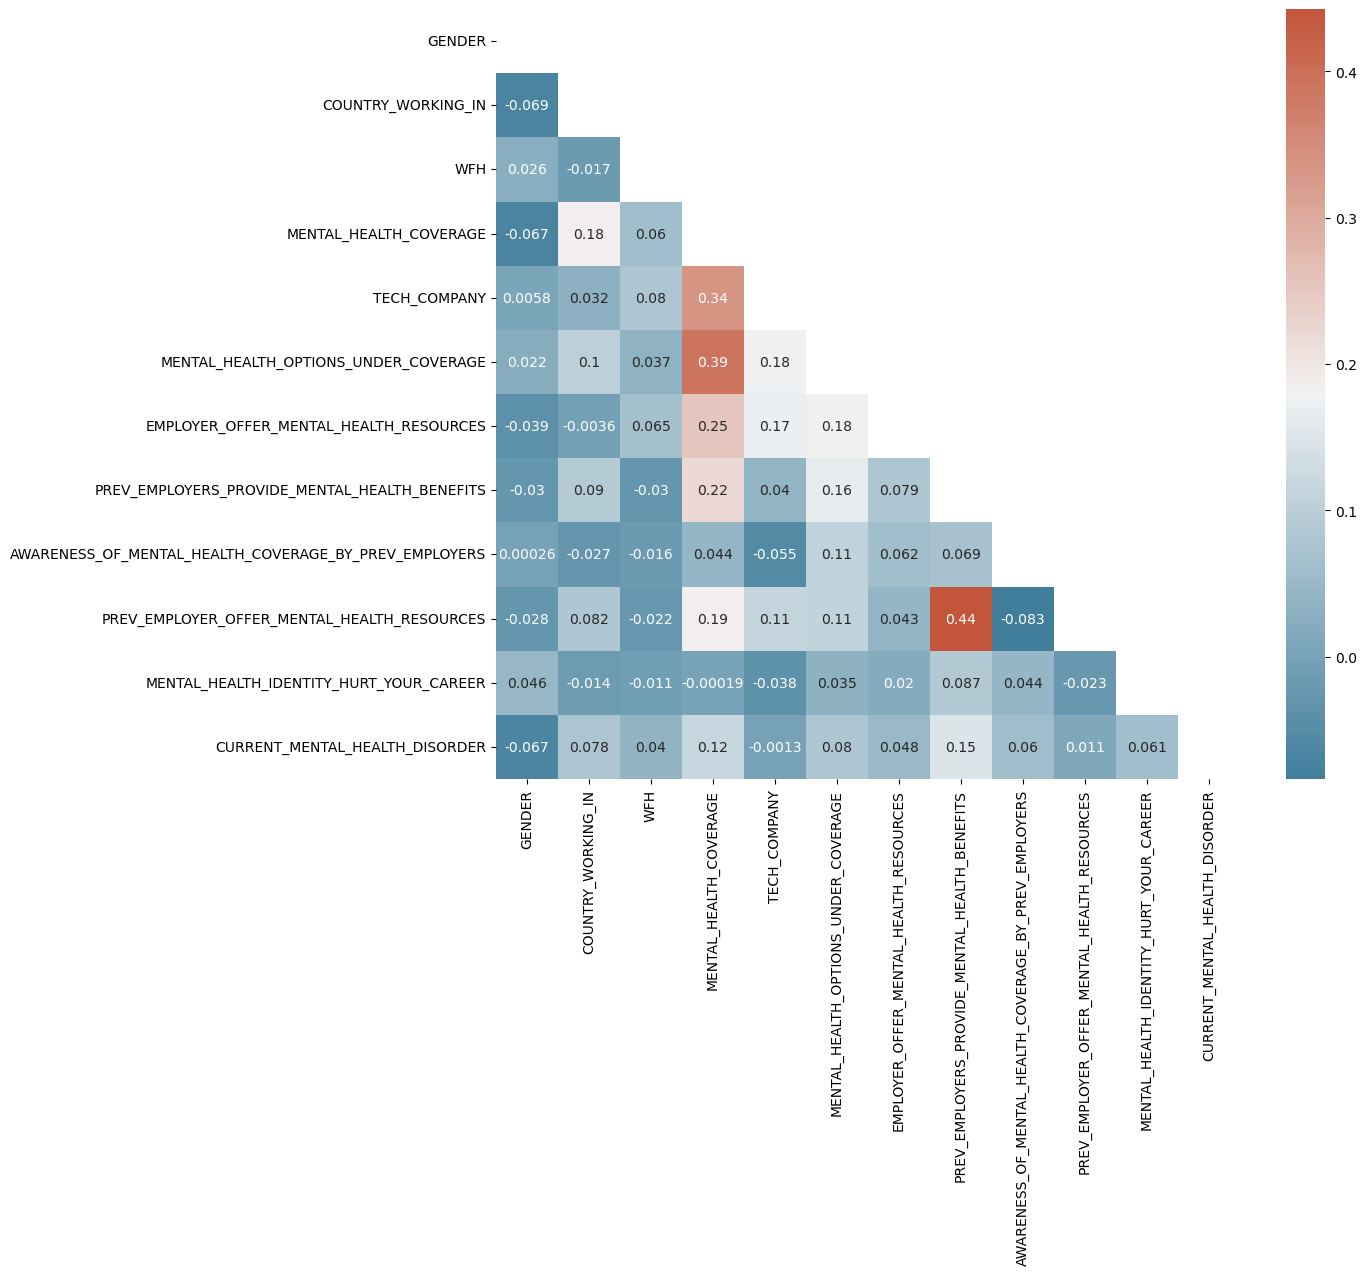

In [47]:
c=encode_df.corr(method='pearson')

# code borrowed from Instructor Nicole L.
# Set up the matplotlib plot configuration

f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle

mask = np.triu(np.ones_like(c, dtype=bool))

# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(c, annot=True, mask = mask, cmap=cmap)

[]

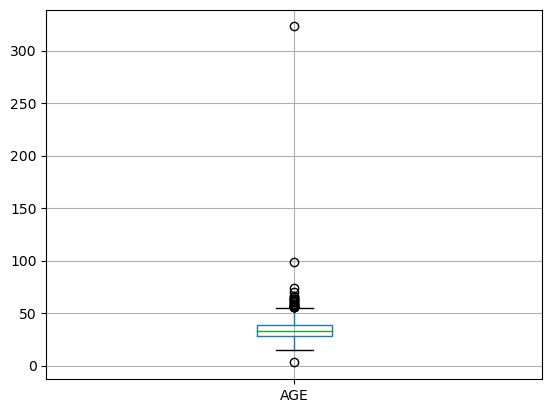

In [50]:
# Boxplot of Age column
b_plot = df.boxplot(column = 'AGE') 
b_plot.plot()

In [82]:
# Create our features

X = encode_df.drop(columns="MENTAL_HEALTH_COVERAGE").values

# Create our target
y =encode_df['MENTAL_HEALTH_COVERAGE'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

Counter(y_train)

Counter({1.0: 398, 0.0: 676})

In [83]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [84]:
# Fitting the model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [85]:
# Making predictions using the testing data.

y_pred = classifier.predict(X_test_scaled)

In [86]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7381615598885793

In [87]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,188,38
Actual 1,56,77


In [88]:
# Print the imbalanced classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       226
         1.0       0.67      0.58      0.62       133

    accuracy                           0.74       359
   macro avg       0.72      0.71      0.71       359
weighted avg       0.73      0.74      0.73       359



In [89]:
# example of grid searching key hyperparametres for logistic regression
# Code was borrowed from https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [90]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

In [91]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.761296 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752622 (0.038798) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752622 (0.038798) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752622 (0.038798) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.752931 (0.038813) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752931 (0.038813) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752622 (0.038798) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.753554 (0.038421) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.753554 (0.038421) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752934 (0.038644) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.756031 (0.038960) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.756031 (0.038960) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752939 (0.040923) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.761296 (0.034595) wi

In [92]:
# example of grid searching key hyperparameters for RandomForestClassifier
# Code was borrowed from https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [93]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

In [94]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.835205 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.814388 (0.042794) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.828998 (0.040734) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.835205 (0.040505) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.823079 (0.038491) with: {'max_features': 'log2', 'n_estimators': 10}
0.834577 (0.042957) with: {'max_features': 'log2', 'n_estimators': 100}
0.831781 (0.044884) with: {'max_features': 'log2', 'n_estimators': 1000}


In [96]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=1000, max_features='log2', random_state=42)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.808


In [97]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.807799442896936

In [98]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       226
         1.0       0.76      0.71      0.73       133

    accuracy                           0.81       359
   macro avg       0.80      0.79      0.79       359
weighted avg       0.81      0.81      0.81       359



In [99]:
# example of grid searching key hyperparametres for SVC
# Code was borrowed from https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [100]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

In [101]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.811627 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.741465 (0.052097) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.778715 (0.043789) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.675046 (0.047378) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.751385 (0.045988) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.806369 (0.043094) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.677521 (0.044737) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.774674 (0.043386) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.811627 (0.038330) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.726252 (0.038870) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.736503 (0.024839) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.776543 (0.037130) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.767820 (0.036365) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.629422 (0.003417) with: {'C': 0.01, 'gamma': 'scale',

In [102]:
# example of grid searching key hyperparametres for KNeighborsClassifier
# Code was borrowed from https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [103]:
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

In [104]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805706 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
0.725632 (0.042946) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.725632 (0.042946) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.762914 (0.052097) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.759499 (0.054086) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.775326 (0.041958) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.772528 (0.047907) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.783991 (0.048649) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.778398 (0.051214) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.785223 (0.040695) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.780256 (0.046376) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.783985 

In [105]:
# example of grid searching key hyperparametres for ridge classifier
# Code was borrowed from https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
from sklearn.linear_model import RidgeClassifier

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [106]:
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

In [107]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.756646 using {'alpha': 0.1}
0.756646 (0.040384) with: {'alpha': 0.1}
0.756646 (0.040384) with: {'alpha': 0.2}
0.756646 (0.040384) with: {'alpha': 0.3}
0.756646 (0.040384) with: {'alpha': 0.4}
0.756646 (0.040384) with: {'alpha': 0.5}
0.756646 (0.040384) with: {'alpha': 0.6}
0.756646 (0.040384) with: {'alpha': 0.7}
0.756646 (0.040384) with: {'alpha': 0.8}
0.756646 (0.040384) with: {'alpha': 0.9}
0.756646 (0.040384) with: {'alpha': 1.0}


In [108]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.818
Accuracy score (validation): 0.816

Learning rate:  0.1
Accuracy score (training): 0.825
Accuracy score (validation): 0.827

Learning rate:  0.25
Accuracy score (training): 0.859
Accuracy score (validation): 0.811

Learning rate:  0.5
Accuracy score (training): 0.895
Accuracy score (validation): 0.816

Learning rate:  0.75
Accuracy score (training): 0.898
Accuracy score (validation): 0.819

Learning rate:  1
Accuracy score (training): 0.901
Accuracy score (validation): 0.833



In [109]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.1,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=42)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(5)

,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0


In [110]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8272980501392758


In [111]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,196,30
Actual 1,39,94


In [112]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       226
         1.0       0.76      0.71      0.73       133

    accuracy                           0.81       359
   macro avg       0.80      0.79      0.79       359
weighted avg       0.81      0.81      0.81       359



In [113]:
import tensorflow as tf

# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="sigmoid", input_dim=11))
nn_model.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
34/34 [==============================] - 1s 950us/step - loss: 0.7338 - accuracy: 0.3706
Epoch 2/50
34/34 [==============================] - 0s 835us/step - loss: 0.6866 - accuracy: 0.5568
Epoch 3/50
34/34 [==============================] - 0s 829us/step - loss: 0.6624 - accuracy: 0.6294
Epoch 4/50
34/34 [==============================] - 0s 821us/step - loss: 0.6489 - accuracy: 0.6294
Epoch 5/50
34/34 [==============================] - 0s 805us/step - loss: 0.6386 - accuracy: 0.6294
Epoch 6/50
34/34 [==============================] - 0s 834us/step - loss: 0.6288 - accuracy: 0.6294
Epoch 7/50
34/34 [==============================] - 0s 834us/step - loss: 0.6191 - accuracy: 0.6294
Epoch 8/50
34/34 [==============================] - 0s 864us/step - loss: 0.6082 - accuracy: 0.6387
Epoch 9/50
34/34 [==============================] - 0s 821us/step - loss: 0.5972 - accuracy: 0.6564
Epoch 10/50
34/34 [==============================] - 0s 821us/step - loss: 0.5859 - accuracy: 0.6816

In [114]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=11))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [115]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [116]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 02s]
val_accuracy: 0.6295264363288879

Best val_accuracy So Far: 0.785515308380127
Total elapsed time: 00h 01m 37s
INFO:tensorflow:Oracle triggered exit


In [117]:
# Evaluate the model using the test data

# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.5083 - accuracy: 0.7855 - 178ms/epoch - 15ms/step
Loss: 0.5083168148994446, Accuracy: 0.785515308380127


In [118]:
from xgboost import XGBClassifier
import optuna

## code borrowed from https://www.kaggle.com/code/faressayah/hyperparameter-optimization-for-machine-learning?scriptVersionId=118252459

def objective(trial):
    # Define the hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)
    max_depth = trial.suggest_int("max_depth", 3, 7)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 5)
    
    # Create an XGBoost classifier
    clf = XGBClassifier(
        learning_rate=learning_rate, 
        max_depth=max_depth,
        n_estimators=n_estimators, 
        min_child_weight=min_child_weight
    )
    
    # Train the classifier and calculate the accuracy on the validation set
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    
    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
clf = XGBClassifier(
    learning_rate=best_params["learning_rate"], 
    max_depth=best_params["max_depth"],
    n_estimators=best_params["n_estimators"], 
    min_child_weight=best_params["min_child_weight"]
)
clf.fit(X, y)

# Evaluate the tuned classifier on the test set
score = clf.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2023-04-25 20:55:54,330] A new study created in memory with name: no-name-1c31f254-3c7a-47c6-a23c-34afc4b12ba1
[I 2023-04-25 20:55:54,957] Trial 0 finished with value: 0.2228412256267409 and parameters: {'learning_rate': 0.09558640401511438, 'max_depth': 6, 'n_estimators': 963, 'min_child_weight': 2}. Best is trial 0 with value: 0.2228412256267409.
[I 2023-04-25 20:55:55,179] Trial 1 finished with value: 0.1977715877437326 and parameters: {'learning_rate': 0.058434202177485225, 'max_depth': 4, 'n_estimators': 530, 'min_child_weight': 4}. Best is trial 1 with value: 0.1977715877437326.
[I 2023-04-25 20:55:55,409] Trial 2 finished with value: 0.20334261838440115 and parameters: {'learning_rate': 0.0847737904813947, 'max_depth': 7, 'n_estimators': 302, 'min_child_weight': 1}. Best is trial 1 with value: 0.1977715877437326.
[I 2023-04-25 20:55:55,530] Trial 3 finished with value: 0.18384401114206128 and parameters: {'learning_rate': 0.06542519667290214, 'max_depth': 4, 'n_estimators': 2

[I 2023-04-25 20:56:01,102] Trial 32 finished with value: 0.18105849582172706 and parameters: {'learning_rate': 0.017150231767382056, 'max_depth': 5, 'n_estimators': 226, 'min_child_weight': 1}. Best is trial 10 with value: 0.16991643454038996.
[I 2023-04-25 20:56:01,265] Trial 33 finished with value: 0.18105849582172706 and parameters: {'learning_rate': 0.010200829155014803, 'max_depth': 4, 'n_estimators': 335, 'min_child_weight': 1}. Best is trial 10 with value: 0.16991643454038996.
[I 2023-04-25 20:56:01,372] Trial 34 finished with value: 0.21448467966573814 and parameters: {'learning_rate': 8.551528245862201e-05, 'max_depth': 5, 'n_estimators': 170, 'min_child_weight': 2}. Best is trial 10 with value: 0.16991643454038996.
[I 2023-04-25 20:56:01,445] Trial 35 finished with value: 0.16713091922005574 and parameters: {'learning_rate': 0.021541398126053785, 'max_depth': 5, 'n_estimators': 102, 'min_child_weight': 1}. Best is trial 35 with value: 0.16713091922005574.
[I 2023-04-25 20:56

[I 2023-04-25 20:56:06,311] Trial 64 finished with value: 0.16991643454038996 and parameters: {'learning_rate': 0.010077124988732603, 'max_depth': 4, 'n_estimators': 246, 'min_child_weight': 1}. Best is trial 39 with value: 0.1643454038997214.
[I 2023-04-25 20:56:06,457] Trial 65 finished with value: 0.16991643454038996 and parameters: {'learning_rate': 0.011441965161199982, 'max_depth': 5, 'n_estimators': 236, 'min_child_weight': 1}. Best is trial 39 with value: 0.1643454038997214.
[I 2023-04-25 20:56:06,543] Trial 66 finished with value: 0.1754874651810585 and parameters: {'learning_rate': 0.020380112919332453, 'max_depth': 5, 'n_estimators': 126, 'min_child_weight': 2}. Best is trial 39 with value: 0.1643454038997214.
[I 2023-04-25 20:56:06,774] Trial 67 finished with value: 0.17827298050139273 and parameters: {'learning_rate': 0.013777235906919755, 'max_depth': 5, 'n_estimators': 403, 'min_child_weight': 1}. Best is trial 39 with value: 0.1643454038997214.
[I 2023-04-25 20:56:06,90

[I 2023-04-25 20:56:10,418] Trial 96 finished with value: 0.1643454038997214 and parameters: {'learning_rate': 0.015037814673883546, 'max_depth': 5, 'n_estimators': 134, 'min_child_weight': 1}. Best is trial 39 with value: 0.1643454038997214.
[I 2023-04-25 20:56:10,511] Trial 97 finished with value: 0.17827298050139273 and parameters: {'learning_rate': 0.021652696833362947, 'max_depth': 5, 'n_estimators': 135, 'min_child_weight': 1}. Best is trial 39 with value: 0.1643454038997214.
[I 2023-04-25 20:56:10,594] Trial 98 finished with value: 0.18105849582172706 and parameters: {'learning_rate': 0.012133774659221108, 'max_depth': 5, 'n_estimators': 115, 'min_child_weight': 1}. Best is trial 39 with value: 0.1643454038997214.
[I 2023-04-25 20:56:10,708] Trial 99 finished with value: 0.17827298050139273 and parameters: {'learning_rate': 0.014990022994824423, 'max_depth': 5, 'n_estimators': 177, 'min_child_weight': 2}. Best is trial 39 with value: 0.1643454038997214.


Best hyperparameters:  {'learning_rate': 0.007842219907847264, 'max_depth': 5, 'n_estimators': 246, 'min_child_weight': 1}
Best score:  0.8356545961002786
Test set accuracy:  0.8607242339832869


In [119]:
## code borrowed from https://www.kaggle.com/code/faressayah/hyperparameter-optimization-for-machine-learning?scriptVersionId=118252459

def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 7)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    
    # Create a random forest classifier
    clf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf
    )
    
    # Train the classifier and calculate the accuracy on the validation set
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
clf = RandomForestClassifier(
    n_estimators=best_params["n_estimators"], 
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"], 
    min_samples_leaf=best_params["min_samples_leaf"]
)
clf.fit(X, y)

# Evaluate the tuned classifier on the test set
score = clf.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2023-04-25 20:57:10,532] A new study created in memory with name: no-name-5e868113-65a8-4753-91d4-6616fe2149f0
[I 2023-04-25 20:57:11,274] Trial 0 finished with value: 0.17270194986072418 and parameters: {'n_estimators': 672, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.17270194986072418.
[I 2023-04-25 20:57:11,764] Trial 1 finished with value: 0.16991643454038996 and parameters: {'n_estimators': 477, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.16991643454038996.
[I 2023-04-25 20:57:12,330] Trial 2 finished with value: 0.17270194986072418 and parameters: {'n_estimators': 551, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.16991643454038996.
[I 2023-04-25 20:57:12,546] Trial 3 finished with value: 0.16991643454038996 and parameters: {'n_estimators': 207, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 1 with va

[I 2023-04-25 20:57:34,462] Trial 34 finished with value: 0.1754874651810585 and parameters: {'n_estimators': 557, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.16713091922005574.
[I 2023-04-25 20:57:34,931] Trial 35 finished with value: 0.1754874651810585 and parameters: {'n_estimators': 430, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.16713091922005574.
[I 2023-04-25 20:57:35,559] Trial 36 finished with value: 0.16991643454038996 and parameters: {'n_estimators': 572, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.16713091922005574.
[I 2023-04-25 20:57:36,328] Trial 37 finished with value: 0.16713091922005574 and parameters: {'n_estimators': 704, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.16713091922005574.
[I 2023-04-25 20:57:37,150] Trial 38 finished with value: 0.1754874651810585 and param

[I 2023-04-25 20:57:57,433] Trial 68 finished with value: 0.16713091922005574 and parameters: {'n_estimators': 797, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 50 with value: 0.1615598885793872.
[I 2023-04-25 20:57:57,592] Trial 69 finished with value: 0.16713091922005574 and parameters: {'n_estimators': 112, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 50 with value: 0.1615598885793872.
[I 2023-04-25 20:57:58,311] Trial 70 finished with value: 0.16713091922005574 and parameters: {'n_estimators': 630, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 50 with value: 0.1615598885793872.
[I 2023-04-25 20:57:59,042] Trial 71 finished with value: 0.16991643454038996 and parameters: {'n_estimators': 668, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 50 with value: 0.1615598885793872.
[I 2023-04-25 20:57:59,765] Trial 72 finished with value: 0.16991643454038996 and pa

Best hyperparameters:  {'n_estimators': 776, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}
Best score:  0.8384401114206128
Test set accuracy:  0.8384401114206128
